In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_player = pd.read_csv('Players.csv')

In [3]:
df_players = df_player.dropna()
df_players = df_players.drop('Unnamed: 0', axis = 1)
df_players.shape

(3189, 7)

In [4]:
df_Season = pd.read_csv('Seasons_Stats.csv')

In [5]:
df_Season.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
df_Seasons = df_Season[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'FG', 'FGA', 'FG%','FT', 'FTA', 'FT%','TS%', 'AST','PF', 'PTS']]

In [7]:
df_Seasons = df_Seasons.dropna()
df_Seasons.shape

(23745, 16)

In [8]:
df_Seasons.head()

,Year,Player,Pos,Age,Tm,G,FG,FGA,FG%,FT,FTA,FT%,TS%,AST,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,144.0,516.0,0.279,170.0,241.0,0.705,0.368,176.0,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,102.0,274.0,0.372,75.0,106.0,0.708,0.435,109.0,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,174.0,499.0,0.349,90.0,129.0,0.698,0.394,140.0,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,22.0,86.0,0.256,19.0,34.0,0.559,0.312,20.0,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,21.0,82.0,0.256,17.0,31.0,0.548,0.308,20.0,27.0,59.0


In [9]:
df_players.head()

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey


In [10]:
df_players['born'] = df_players.born.astype('int64')
df_Seasons['Year'] = df_Seasons.Year.astype('int64')
df_Seasons['Age'] = df_Seasons.Age.astype('int64')
df_Seasons['G'] = df_Seasons.G.astype('int64')

In [11]:
#Объединим две таблицы в одну
all_inform = df_Seasons.merge(df_players, how = 'left', left_on='Player', right_on='Player')
all_information = all_inform.dropna()
all_information.head()

,Year,Player,Pos,Age,Tm,G,FG,FGA,FG%,FT,...,TS%,AST,PF,PTS,height,weight,collage,born,birth_city,birth_state
1,1950,Cliff Barker,SG,29,INO,49,102.0,274.0,0.372,75.0,...,0.435,109.0,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
6,1950,Ralph Beard,G,22,INO,60,340.0,936.0,0.363,215.0,...,0.422,233.0,132.0,895.0,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
8,1950,Charlie Black,F-C,28,TOT,65,226.0,813.0,0.278,209.0,...,0.346,163.0,273.0,661.0,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
9,1950,Charlie Black,F-C,28,FTW,36,125.0,435.0,0.287,132.0,...,0.362,75.0,140.0,382.0,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
10,1950,Charlie Black,F-C,28,AND,29,101.0,378.0,0.267,77.0,...,0.326,88.0,133.0,279.0,196.0,90.0,University of Kansas,1921.0,Arco,Idaho


In [12]:
#Смотрим игроков с наибольшим кол-вом очков
#Используем переменные Player и PTS типа object и float
#Библиотека Matplotlib
df_Seasons1 = df_Seasons.groupby('Player')[['PTS']].sum()\
    .sort_values('PTS', ascending=False).head(10)
    
df_Seasons1.style.bar()

,PTS
Player,
Kareem Abdul-Jabbar*,38387
Karl Malone*,36928
Wilt Chamberlain*,33953
Kobe Bryant,33643
Michael Jordan*,32292
Eddie Johnson,31840
Dirk Nowitzki,30260
Shaquille O'Neal*,29428
LeBron James,28787


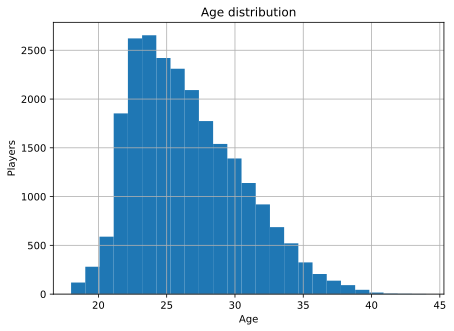

In [13]:
#Так же посмотрим возрастное распределение по всем игрокам при помощи гистограммы
#Переменная Age типа int
ax = df_Seasons.Age.hist(bins = 25)
ax.set_title('Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Players')

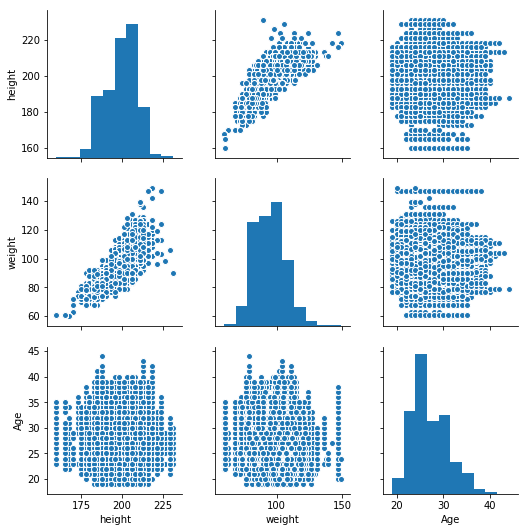

In [18]:
# смотрим зависимость роста от веса и позраста игроков
# библиотека seaborn
#Завилимость рост-вес относительно линейная,а от возраста нет

%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    all_information[['height', 'weight', 'Age']]);
sns_plot.savefig('pairplot.png')

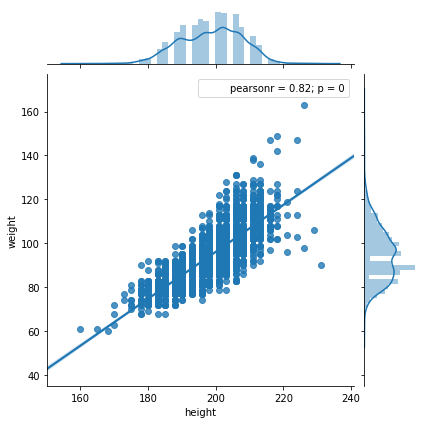

In [19]:
#Посмотрим рост-вес отдельно для наглядности 
sns.jointplot(x='height', y='weight', 
              data=df_players, kind='reg');

In [21]:
#Уберем из выборки игроков с редко встречающимся ростом 
all_information['height'] = all_information.height.astype('int64')
all_information_2 = all_information.loc[(all_information['height'] >180)&(all_information['height'] <220)]

In [22]:
#посмотреть на распределение кол-ва игроков по двум критериям: роста и позиции на поле
#используем heat map
all_information_1 = all_information_2.pivot_table(
                        index='height',
                        columns='Pos', 
                        values='Player', 
                        aggfunc='count').fillna(0).applymap(float)

all_information_1

Pos,C,C-F,C-PF,C-SF,F,F-C,F-G,G,G-F,PF,...,PG-SF,PG-SG,SF,SF-PF,SF-PG,SF-SG,SG,SG-PF,SG-PG,SG-SF
height,,,,,,,,,,,,,,,,,,,,,
183,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,...,0.0,1.0,11.0,0.0,0.0,0.0,59.0,0.0,4.0,0.0
185,14.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,30.0,...,0.0,4.0,18.0,0.0,0.0,0.0,156.0,0.0,3.0,0.0
188,50.0,0.0,0.0,0.0,2.0,0.0,12.0,14.0,16.0,50.0,...,0.0,3.0,38.0,0.0,0.0,0.0,292.0,0.0,2.0,1.0
190,1.0,0.0,0.0,0.0,16.0,0.0,22.0,13.0,5.0,29.0,...,0.0,7.0,69.0,2.0,0.0,2.0,575.0,2.0,8.0,0.0
193,52.0,0.0,0.0,0.0,13.0,7.0,4.0,0.0,1.0,20.0,...,0.0,4.0,110.0,0.0,0.0,0.0,862.0,0.0,5.0,0.0
196,7.0,0.0,0.0,0.0,15.0,11.0,3.0,3.0,2.0,44.0,...,0.0,3.0,437.0,0.0,1.0,9.0,888.0,0.0,2.0,4.0
198,19.0,3.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,218.0,...,0.0,2.0,741.0,2.0,0.0,9.0,688.0,0.0,1.0,10.0
201,50.0,2.0,1.0,0.0,0.0,16.0,0.0,4.0,0.0,449.0,...,0.0,0.0,1249.0,4.0,0.0,2.0,322.0,1.0,0.0,4.0
203,146.0,8.0,6.0,1.0,1.0,6.0,0.0,0.0,0.0,868.0,...,1.0,0.0,775.0,3.0,0.0,2.0,141.0,0.0,0.0,0.0


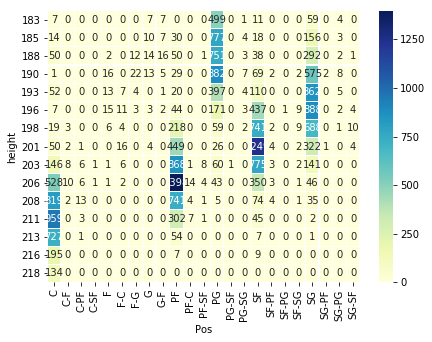

In [23]:
#смотрим на каких позициях игроков какого роста больше
sns.heatmap(all_information_1, annot=True, fmt=".0f", 
            linewidths=.10, cmap="YlGnBu");

In [24]:
#Следующие графики будем строить с помощью plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [25]:
#Смотрим кол-во забитых бросков по командам
all_information['FG'] = all_information.FG.astype('int64')
field_goals = all_information.groupby('Tm')[['FG']].sum()
field_goals.head()

,FG
Tm,
AND,1239
ATL,143996
BAL,35358
BLB,4999
BOS,196120


In [26]:
#Смотрим сумму набранных очков по командам
all_information['PTS'] = all_information.PTS.astype('int64')
sum_points = all_information.groupby('Tm')[['PTS']].sum()
sum_points.head()

,PTS
Tm,
AND,3654
ATL,375116
BAL,90015
BLB,14344
BOS,510982


In [27]:
collage_df = field_goals.join(sum_points)
collage_df.columns = ['Field_goals', 'Sum_points']
collage_df.head()

,Field_goals,Sum_points
Tm,,
AND,1239,3654
ATL,143996,375116
BAL,35358,90015
BLB,4999,14344
BOS,196120,510982


In [28]:
#Смотрим как соотносятся броски с очками 
#Удобно для каждой команды прямо на графике смотреть кол-во забитых бросток и набранные очки, сразу видно лидирующие команды
trace0 = go.Scatter(
    x=collage_df.index,
    y=collage_df.Field_goals,
    name='Field_goals'
)

trace1 = go.Scatter(
    x=collage_df.index,
    y=collage_df.Sum_points,
    name='Sum_points'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Collage'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)